# Trabajo práctico N° 4

Para los siguientes ejercicios vamos a usar el Wisconsin Breast Cancer dataset, construído a partir de imágenes digitalizadas. Las mismas describen la información obtenida de cada imagen de célula mamaria biopsiada, especificando si el diagnóstico sobre la misma es que es benigna o maligna.

Se pide:

1. Declarar una variable random_state igual al número de alumno en la hoja de cálculo "Entregas TPs" en el Google Drive de la materia.
2. Implementar un clasificador kNN.
3. Aplicarle z-score standarization a los datos. Dividir en conjunto de train y test y entrenar el clasificador con el sub-conjunto de datos de entrenamiento, mostrando la correspondiente tasa de aciertos. Utilizar el respectivo random_state.
4. Considere el caso donde un incorrecto diagnóstico de cáncer cuando la célula es benigna tiene un costo de 5, mientras que una errónea omisión de una célula maligna tiene un costo de 20. Modificar las salidas del clasificador para que el mismo realice la mayor reducción posible del costo por errores de clasificación, e imprimir dichas salidas. Ayuda: una forma es utilizar el método *predicted_proba()* para obtener las probabilidades.
5. Considerando el punto anterior, ampliar el código para que seleccione automáticamente o mediante iteraciones la cantidad de vecinos que minimiza el costo de un error de predicción. Especificar cuál es el costo mínimo obtenido tras dicha minimización.

Fecha de entrega: **17/05/2017**.

Nota: la resolución de los ejercicios es **individual**; en el caso de que dos ejercicios enviados contengan un código igual o muy similar (sin considerar los comentarios), se los considerará a ambos como desaprobados. La reutilización del código del notebook está permitida (por ejemplo para confeccionar gráficos).

## Desarrollo

#### 1. Se declara la variable random_state con el numero de alumno correspondiente (3) y se instancia el dataset breast_cancer

In [1]:
import numpy as np
from sklearn.datasets import load_breast_cancer
semilla = np.random.RandomState(3)
data = load_breast_cancer()
x = data.data
y = data.target
# data.target_names

#### 2. Se Implementa un clasificador kNN

In [2]:
from sklearn import neighbors
clf = neighbors.KNeighborsClassifier(weights='distance', n_neighbors=10)

#### 3. Se aplica z-score standarization a los datos

In [3]:
from scipy import stats
x_norm = stats.zscore(x)

#### Se divide en conjunto de train y test y entrenar el clasificador con el sub-conjunto de datos de entrenamiento. Luego se muestra la tasa de aciertos.

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_norm, y, random_state=semilla, test_size=0.2)
clf.fit(X_train, y_train)
print('Tasa de aciertos en la clasificación: ', clf.score(X_test, y_test))

Tasa de aciertos en la clasificación:  0.947368421053


#### 4. Se establecen los costos de lfn y lfp
Para este caso se tiene en cuenta que: <br>
Benigno: 1<br>
Maligno: 0
<br>
Por lo tanto:
* Diagnosticar Benigno (1) siendo Maligno (0) tiene un costo de: 20 (lfn)
* Diagnosticar Maligno (0) siendo Benigno (1) tiene un costo de: 5 (lfp)

In [5]:
lfn = 20
lfp = 5

#### Se define una funcion que modifica las salidas del clasificador teniendo en cuenta los costos definidos anteriormente

In [6]:
def predecir(X_test, lfn, lfp):
    c = lfn / lfp
    y_hat_proba = clf.predict_proba(X_test)
    y_hat = []
    for i in range(0, len(y_hat_proba)):
        # P(y=1∣x)>(1/c) * P(y=0∣x) ; P(Benigno) > 1/c P(Maligno)
        if y_hat_proba[i, 1] > ((1 / c) * y_hat_proba[i, 0]):
            # Agregamos un 1 porque es benigno
            y_hat.append(1)
        else:
            # Agregamos un 0 porque es maligno
            y_hat.append(0)
    return y_hat

#### Se predice y se muestra la salida

In [7]:
y_hat = predecir(X_test, lfn, lfp)
print('La salida de la prediccion es: \n', y_hat)

La salida de la prediccion es: 
 [1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1]


#### Se muestran los errores

In [8]:
from sklearn import metrics
import pandas
# Creamos la confusion matrix y le asignamos las filas y columnas correspondientes
cm = metrics.confusion_matrix(y_test, y_hat, labels=[0,1])
print(cm)

[[33  7]
 [ 0 74]]


#### Formateando

In [9]:
list1 = ["Real maligno (0)", "Real benigno (1)"]
list2 = ["Predicho maligno (0)", "Predicho benigno (1)"]
pandas.DataFrame(cm, list1, list2)

,Predicho maligno (0),Predicho benigno (1)
Real maligno (0),33,7
Real benigno (1),0,74


#### 5. Se busca el numero de vecinos $k$ que de el menor costo posible

El k optimo es:  1 . Da un costo de:  60


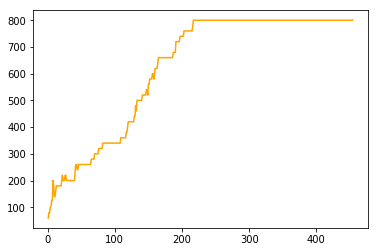

In [10]:
import matplotlib.pyplot as plt
k_optimo = 0 
costo_optimo = 'inicial'
totales = []
vecinos = []
for k in range(1, len(X_train)):
    clf = neighbors.KNeighborsClassifier(weights='distance', n_neighbors=k)
    clf.fit(X_train, y_train)
    y_hat_for = predecir(X_test, lfn, lfp)

    cm = metrics.confusion_matrix(y_test, y_hat_for, labels=[0,1])
    total = cm[0][1] * lfn + cm[1][0] * lfp
    totales.append(total)
    vecinos.append(k)
    if costo_optimo == 'inicial':
        costo_optimo = total
        k_optimo = k
    else:
        if total < costo_optimo:
            costo_optimo = total
            k_optimo = k
    
print('El k optimo es: ', k_optimo, '. Da un costo de: ', costo_optimo)

plt.plot(vecinos, totales, color='orange')
plt.show()